<a href="https://colab.research.google.com/github/okayteakay/Heart-Disease-Prediction/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Feature Selection

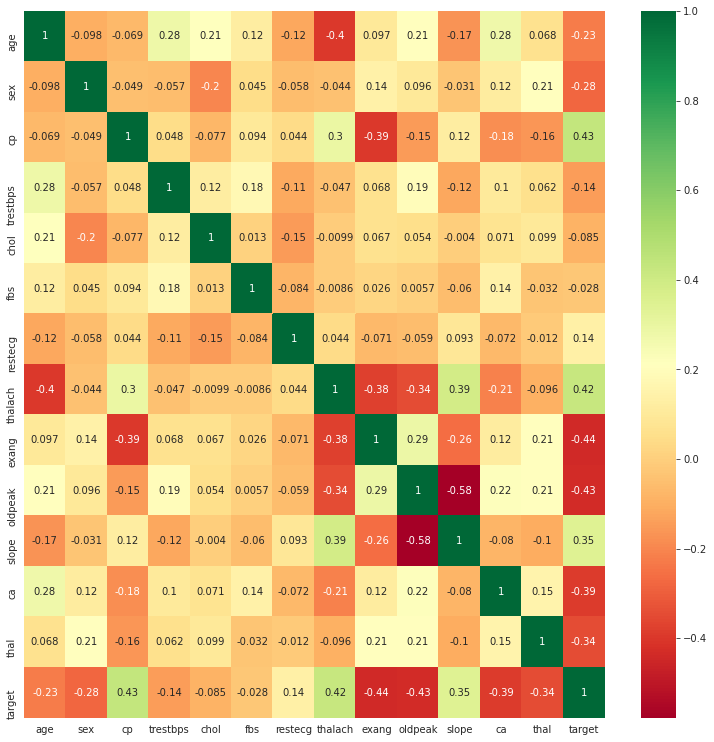

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

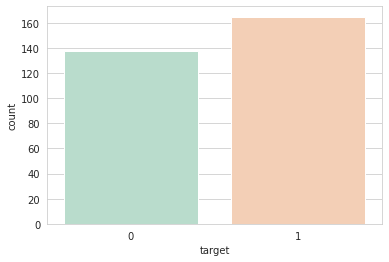

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='Pastel2')
plt.show()

In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 
                                        'fbs','restecg', 
                                        'exang', 'slope', 
                                        'ca', 'thal'])

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)


In [ ]:
X_train.shape

(242, 30)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_train.shape

(242, 30)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[24  3]
 [ 4 30]]


0.8852459016393442

In [ ]:
knn_scores = []
for k in range(1,15):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())


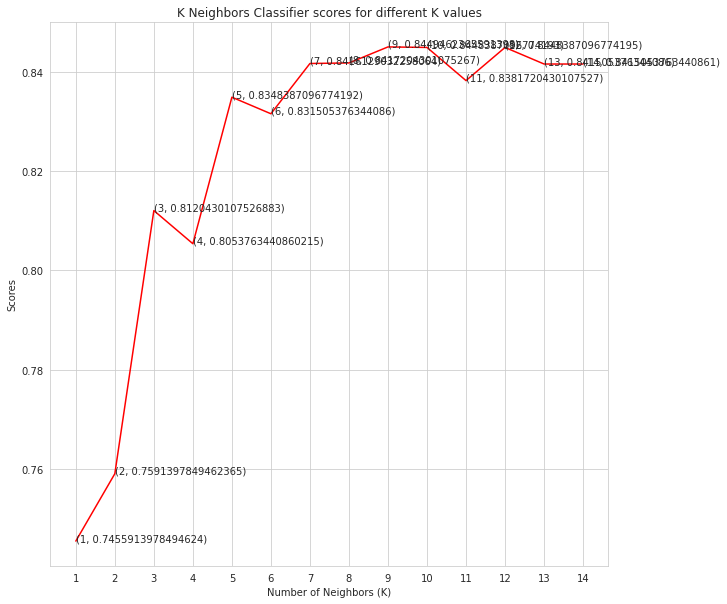

In [ ]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 15)], knn_scores, color = 'red')
for i in range(1,15):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score.mean()

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
score = knn_classifier.score(X_test, y_test)
print(score)

0.8360655737704918


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score.mean()

0.8360655737704918

In [ ]:
rf_scores = []
for r in range(1,15):
    randomforest_classifier= RandomForestClassifier(n_estimators=r)
    score=cross_val_score(randomforest_classifier,X,y)
    rf_scores.append(score.mean())

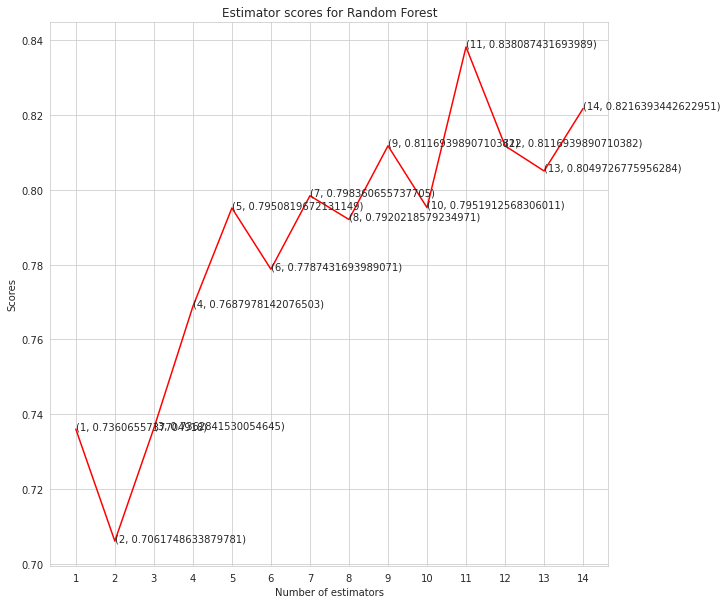

In [ ]:
plt.figure(figsize=(10,10))
plt.plot([r for r in range(1, 15)], rf_scores, color = 'red')
for i in range(1,15):
    plt.text(i, rf_scores[i-1], (i, rf_scores[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Estimator scores for Random Forest')
plt.show()

In [ ]:
randomforest_classifier = RandomForestClassifier(n_estimators=11)
score.mean()
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
score = randomforest_classifier.score(X_test, y_test)
print(score)

0.8032786885245902


In [ ]:
data = [[48, 1, 2, 140, 280, 0, 0, 147, 1, 1.7, 1,0,0], [72, 0, 3, 150, 330, 1, 1, 166, 1, 3.9, 2,4,2]]
dft = pd.DataFrame(data, columns = df.columns[:-1])

In [ ]:
df_copy = df.copy()
df_copy = df_copy.append(dft)

In [ ]:
df_copy.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0.0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0.0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0.0
0,48,1,2,140,280,0,0,147,1,1.7,1,0,0,NaN
1,72,0,3,150,330,1,1,166,1,3.9,2,4,2,NaN


In [ ]:
df_copy = df_copy.reset_index()

In [ ]:
df_copy.tail()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0.0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0.0
302,302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0.0
303,0,48,1,2,140,280,0,0,147,1,1.7,1,0,0,NaN
304,1,72,0,3,150,330,1,1,166,1,3.9,2,4,2,NaN


In [ ]:
df_copy = pd.get_dummies(df_copy, columns = ['sex', 'cp', 
                                        'fbs','restecg', 
                                        'exang', 'slope', 
                                        'ca', 'thal'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_copy)
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_copy[columns_to_scale] = scaler.fit_transform(df_copy[columns_to_scale])
df_copy.tail()

,index,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
300,300,1.494017,0.702614,-1.035055,-0.381020,2.011938,0.0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,301,0.285329,-0.097856,-2.231223,-1.520775,0.127501,0.0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
302,302,0.285329,-0.097856,-0.205455,1.065592,-0.900373,0.0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
303,0,-0.703596,0.473908,0.643438,-0.118000,0.555782,NaN,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
304,1,1.933539,1.045672,1.608090,0.714898,2.440219,NaN,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
df_copy.drop(['index', 'target'], axis = 1)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.944613,0.759790,-0.263334,0.013510,1.069720,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.912284,-0.097856,0.064647,1.635469,2.097594,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.472761,-0.097856,-0.822832,0.977918,0.298814,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.175449,-0.669620,-0.205455,1.240939,-0.215123,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.285329,-0.669620,2.071123,0.583388,-0.386436,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1.494017,0.702614,-1.035055,-0.381020,2.011938,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,0.285329,-0.097856,-2.231223,-1.520775,0.127501,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
302,0.285329,-0.097856,-0.205455,1.065592,-0.900373,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
303,-0.703596,0.473908,0.643438,-0.118000,0.555782,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0


In [ ]:
dft = df_copy.iloc[-2:]

In [ ]:
dft.drop(['target', 'index'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dft

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
303,-0.703596,0.473908,0.643438,-0.118000,0.555782,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
304,1.933539,1.045672,1.608090,0.714898,2.440219,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
pred1 = randomforest_classifier.predict(dft)

In [ ]:
pred1

array([0, 1])